In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("komahere/ufc-fights-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.22M/1.22M [00:00<00:00, 2.78MB/s]

Extracting files...
Path to dataset files: /Users/lucijaaleksic/.cache/kagglehub/datasets/komahere/ufc-fights-dataset/versions/1


In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Stats

In [36]:
stats = pd.read_csv("stats/stats.csv", sep=";")
stats.head()

,red_fighter_name,blue_fighter_name,event_date,red_fighter_nickname,blue_fighter_nickname,red_fighter_result,blue_fighter_result,method,round,time,...,red_fighter_sig_str_body_pct,blue_fighter_sig_str_body_pct,red_fighter_sig_str_leg_pct,blue_fighter_sig_str_leg_pct,red_fighter_sig_str_distance_pct,blue_fighter_sig_str_distance_pct,red_fighter_sig_str_clinch_pct,blue_fighter_sig_str_clinch_pct,red_fighter_sig_str_ground_pct,blue_fighter_sig_str_ground_pct
0,ILIA TOPURIA,MAX HOLLOWAY,26/10/2024,El Matador,Blessed,W,L,KO/TKO,3,1:34,...,14,16,20,24,94,100,0,0,5,0
1,ROBERT WHITTAKER,KHAMZAT CHIMAEV,26/10/2024,The Reaper,Borz,L,W,Submission,1,3:34,...,0,33,100,0,100,0,0,0,0,100
2,MAGOMED ANKALAEV,ALEKSANDAR RAKIC,26/10/2024,-,Rocket,W,L,Decision - Unanimous,3,5:00,...,40,16,23,64,90,94,9,5,0,0
3,LERONE MURPHY,DAN IGE,26/10/2024,The Miracle,50K,W,L,Decision - Unanimous,3,5:00,...,23,10,7,13,71,69,23,13,5,17
4,SHARA MAGOMEDOV,ARMEN PETROSYAN,26/10/2024,Bullet,Superman,W,L,KO/TKO,2,4:52,...,44,12,18,58,96,97,3,2,0,0


In [37]:
# distinct values in stats bonus column
stats["bonus"].head()

0    belt
1    perf
2       -
3       -
4    perf
Name: bonus, dtype: object

In [8]:
stats.columns

Index(['red_fighter_name', 'blue_fighter_name', 'event_date',
       'red_fighter_nickname', 'blue_fighter_nickname', 'red_fighter_result',
       'blue_fighter_result', 'method', 'round', 'time', 'time_format',
       'referee', 'details', 'bout_type', 'bonus', 'event_name',
       'event_location', 'red_fighter_KD', 'blue_fighter_KD',
       'red_fighter_sig_str', 'blue_fighter_sig_str',
       'red_fighter_sig_str_pct', 'blue_fighter_sig_str_pct',
       'red_fighter_total_str', 'blue_fighter_total_str', 'red_fighter_TD',
       'blue_fighter_TD', 'red_fighter_TD_pct', 'blue_fighter_TD_pct',
       'red_fighter_sub_att', 'blue_fighter_sub_att', 'red_fighter_rev',
       'blue_fighter_rev', 'red_fighter_ctrl', 'blue_fighter_ctrl',
       'red_fighter_sig_str_head', 'blue_fighter_sig_str_head',
       'red_fighter_sig_str_body', 'blue_fighter_sig_str_body',
       'red_fighter_sig_str_leg', 'blue_fighter_sig_str_leg',
       'red_fighter_sig_str_distance', 'blue_fighter_sig_str_distan

In [76]:
stats["method"].unique()

array(['KO/TKO', 'Submission', 'Decision - Unanimous', 'Decision - Split',
       "TKO - Doctor's Stoppage", 'Decision - Majority', 'DQ'],
      dtype=object)

### Fight time and rounds

/Users/lucijaaleksic/anaconda3/envs/torch/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


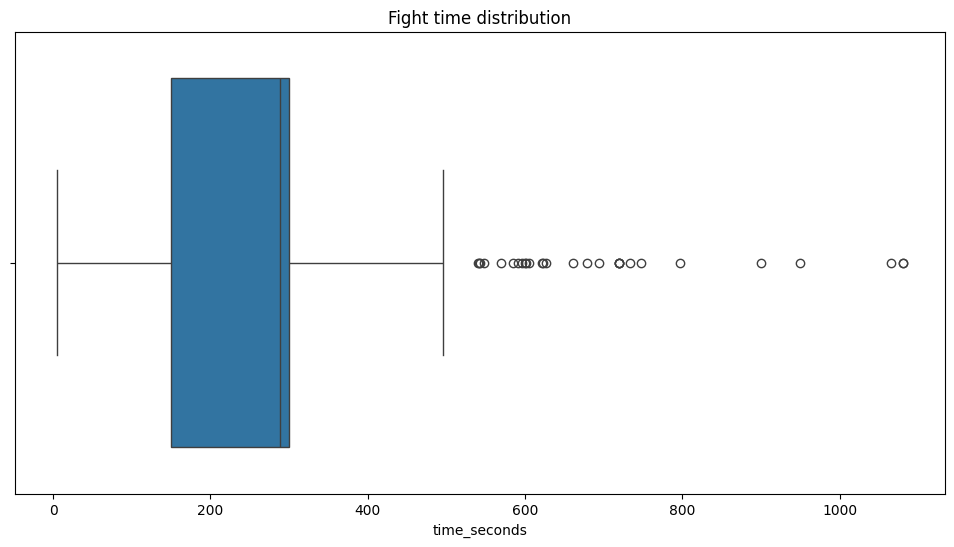

In [15]:
# fight time boxplot

# add columnt time_seconds to stats - from min:sec to seconds
stats["time_seconds"] = stats["time"].apply(lambda x: int(x.split(":")[0])*60 + int(x.split(":")[1]))

plt.figure(figsize=(12, 6))
sns.boxplot(x="time_seconds", data=stats)
plt.title("Fight time distribution")
plt.show()

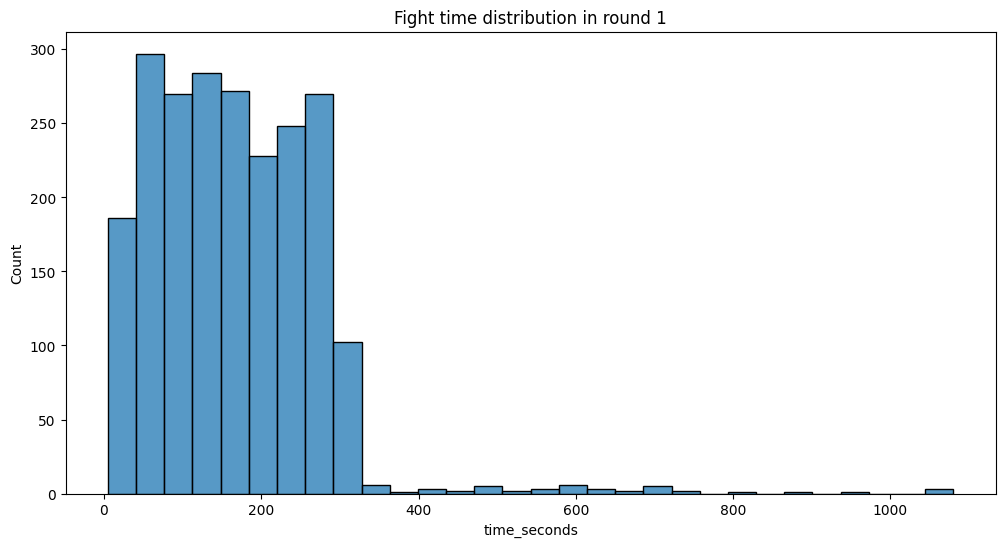

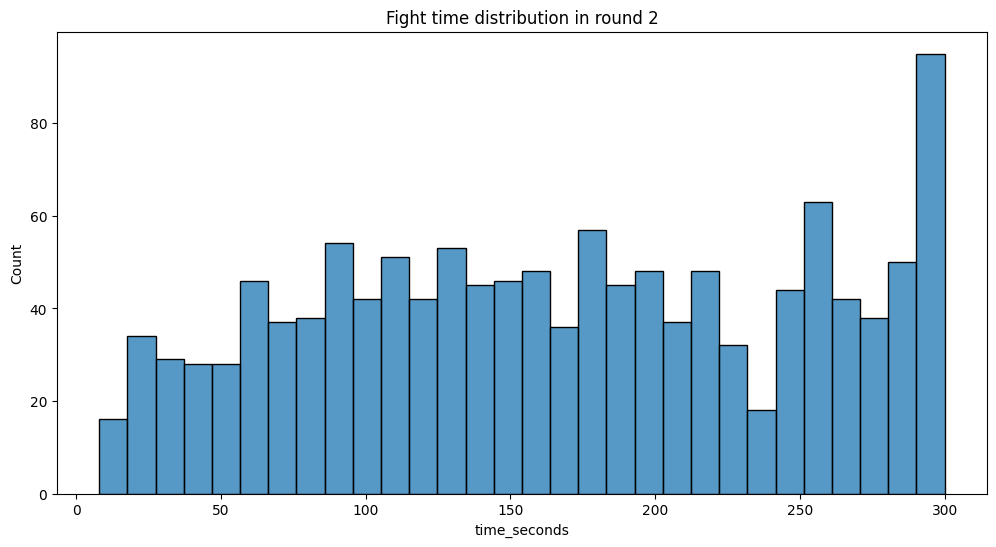

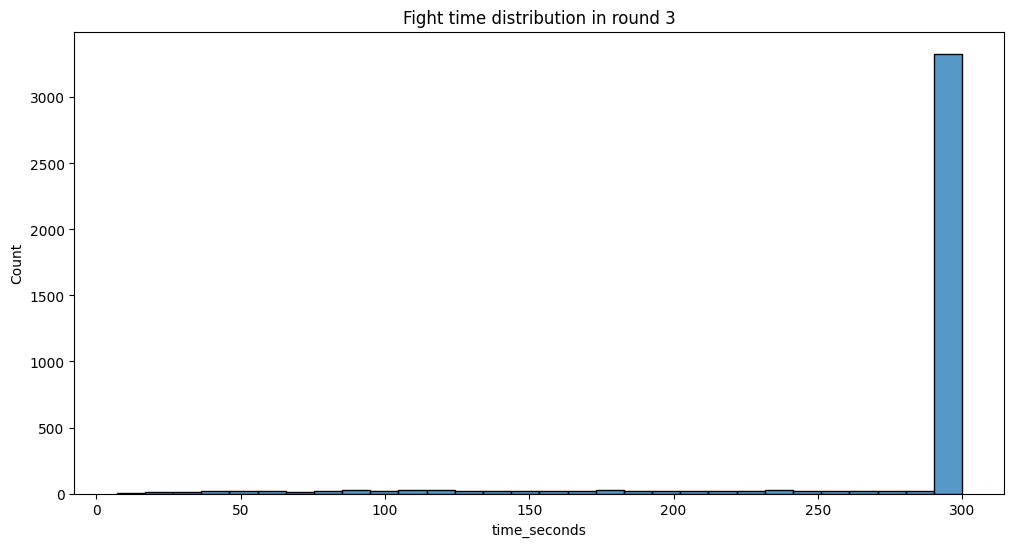

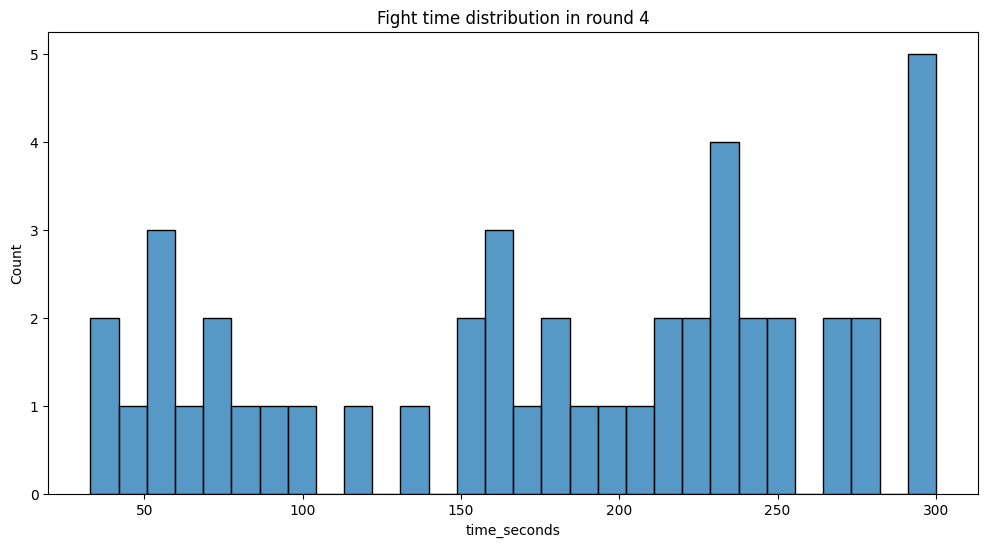

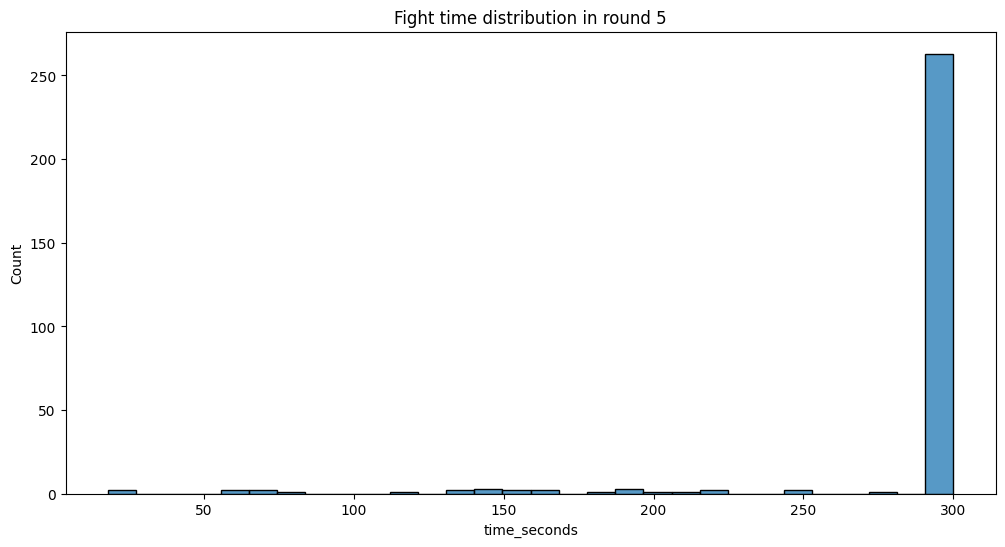

In [25]:
# plot fight time distribution per rounds 
for i in range(1, 6):
    plt.figure(figsize=(12, 6))
    sns.histplot(stats[stats["round"] == i]["time_seconds"], bins=30)
    plt.title(f"Fight time distribution in round {i}")
    plt.show()

In [21]:
# which is the longest fight?
stats[stats["time_seconds"] == stats["time_seconds"].max()]

,red_fighter_name,blue_fighter_name,event_date,red_fighter_nickname,blue_fighter_nickname,red_fighter_result,blue_fighter_result,method,round,time,...,blue_fighter_sig_str_body_pct,red_fighter_sig_str_leg_pct,blue_fighter_sig_str_leg_pct,red_fighter_sig_str_distance_pct,blue_fighter_sig_str_distance_pct,red_fighter_sig_str_clinch_pct,blue_fighter_sig_str_clinch_pct,red_fighter_sig_str_ground_pct,blue_fighter_sig_str_ground_pct,time_seconds
7686,OLEG TAKTAROV,MARCO RUAS,16/12/1995,The Russian Bear,King of the Streets,W,L,Decision - Unanimous,1,18:00,...,0,66,78,100,100,0,0,0,0,1080
7687,DAN SEVERN,DAVID ABBOTT,16/12/1995,The Beast,Tank,W,L,Decision - Unanimous,1,18:00,...,0,8,0,0,0,8,66,91,33,1080


In [26]:
# most common round number
stats["round"].value_counts()

round
3    3924
1    2203
2    1290
5     291
4      46
Name: count, dtype: int64

### Fight location

In [29]:
stats["event_location"].unique()

array(['Abu Dhabi, Abu Dhabi, United Arab Emirates',
       'Las Vegas, Nevada, USA', 'Salt Lake City, Utah, USA',
       'Paris, Ile-de-France, France',
       'Perth, Western Australia, Australia',
       'Manchester, England, United Kingdom', 'Denver, Colorado, USA',
       'Riyadh, Riyadh, Saudi Arabia', 'Louisville, Kentucky, USA',
       'Newark, New Jersey, USA', 'St. Louis, Missouri, USA',
       'Rio de Janeiro, Rio de Janeiro, Brazil',
       'Atlantic City, New Jersey, USA', 'Miami, Florida, USA',
       'Mexico City, Distrito Federal, Mexico',
       'Anaheim, California, USA', 'Toronto, Ontario, Canada',
       'Austin, Texas, USA', 'New York City, New York, USA',
       'Sao Paulo, Sao Paulo, Brazil',
       'Sydney, New South Wales, Australia', 'Kallang, Singapore',
       'Boston, Massachusetts, USA', 'Nashville, Tennessee, USA',
       'London, England, United Kingdom', 'Jacksonville, Florida, USA',
       'Vancouver, British Columbia, Canada',
       'Charlotte, North

In [30]:
# split location to city and country
stats["city"] = stats["event_location"].apply(lambda x: x.split(",")[0])
stats["country"] = stats["event_location"].apply(lambda x: x.split(",")[1]) # in usa it's state

In [31]:
# most common cities
stats["city"].value_counts().head(10)

city
Las Vegas         2609
Abu Dhabi          233
London             166
Rio de Janeiro     146
Newark             112
Anaheim            105
Houston            103
Sao Paulo           99
Atlantic City       91
Toronto             86
Name: count, dtype: int64

In [32]:
# most common countries
stats["country"].value_counts().head(10)

country
Nevada        2609
California     353
Texas          292
England        275
Florida        249
New Jersey     223
Abu Dhabi      216
New York       201
Ontario        111
Colorado       110
Name: count, dtype: int64

### Fighters

In [34]:
# transform the stats dataset to have one row per figher 
# - red_fighter_name and blue_fighter_name = fighter
# - red_fighter_result and blue_fighter_result = result
# - red_fighter_nickname and blue_fighter_nickname = nickname
# - keep event_date

fighters = pd.DataFrame()
fighters["fighter"] = pd.concat([stats["red_fighter_name"], stats["blue_fighter_name"]])
fighters["result"] = pd.concat([stats["red_fighter_result"], stats["blue_fighter_result"]])
fighters["nickname"] = pd.concat([stats["red_fighter_nickname"], stats["blue_fighter_nickname"]])
fighters["event_date"] = stats["event_date"].reset_index(drop=True)

fighters.head()

,fighter,result,nickname,event_date
0,ILIA TOPURIA,W,El Matador,26/10/2024
1,ROBERT WHITTAKER,L,The Reaper,26/10/2024
2,MAGOMED ANKALAEV,W,-,26/10/2024
3,LERONE MURPHY,W,The Miracle,26/10/2024
4,SHARA MAGOMEDOV,W,Bullet,26/10/2024


In [38]:
# fighter with the most fights
fighters["fighter"].value_counts().head(10)

fighter
JIM MILLER          43
ANDREI ARLOVSKI     41
DONALD CERRONE      37
CLAY GUIDA          36
RAFAEL DOS ANJOS    36
JEREMY STEPHENS     33
DEMIAN MAIA         33
NEIL MAGNY          33
CHARLES OLIVEIRA    32
DIEGO SANCHEZ       32
Name: count, dtype: int64

In [39]:
# fighter with the most wins (result == "W")
fighters[fighters["result"] == "W"]["fighter"].value_counts().head(10)

fighter
JIM MILLER          26
DONALD CERRONE      23
ANDREI ARLOVSKI     23
NEIL MAGNY          22
DUSTIN POIRIER      22
CHARLES OLIVEIRA    22
MAX HOLLOWAY        22
DEMIAN MAIA         22
JON JONES           21
RAFAEL DOS ANJOS    21
Name: count, dtype: int64

In [40]:
# fighter with the most losses (result == "L")
fighters[fighters["result"] == "L"]["fighter"].value_counts().head(10)

fighter
JEREMY STEPHENS       18
ANDREI ARLOVSKI       18
CLAY GUIDA            18
JIM MILLER            17
RAFAEL DOS ANJOS      15
MICHAEL JOHNSON       15
DONALD CERRONE        14
ANGELA HILL           14
TIM MEANS             14
OVINCE SAINT PREUX    13
Name: count, dtype: int64

In [46]:
# fighter with the best win ratio
# fighters with more than 4 fights
fighters_5 = fighters["fighter"].value_counts()[fighters["fighter"].value_counts() > 5].index
fighters_5 = fighters[fighters["fighter"].isin(fighters_5)]

win_ratio = fighters_5.groupby("fighter")["result"].apply(lambda x: x[x == "W"].count() / x.count()).sort_values(ascending=False)
win_ratio.head(20)

fighter
UMAR NURMAGOMEDOV        1.000000
JACK DELLA MADDALENA     1.000000
NATALIA SILVA            1.000000
CAIO BORRALHO            1.000000
TATIANA SUAREZ           1.000000
PADDY PIMBLETT           1.000000
MANON FIOROT             1.000000
LERONE MURPHY            1.000000
KHAMZAT CHIMAEV          1.000000
KHABIB NURMAGOMEDOV      1.000000
MUHAMMAD MOKAEV          1.000000
DRICUS DU PLESSIS        1.000000
ZABIT MAGOMEDSHARIPOV    1.000000
SHAVKAT RAKHMONOV        1.000000
MOVSAR EVLOEV            1.000000
IAN MACHADO GARRY        1.000000
ILIA TOPURIA             1.000000
JON JONES                0.954545
ISLAM MAKHACHEV          0.937500
MAGOMED ANKALAEV         0.916667
Name: result, dtype: float64

### Punches landed analysis (body, leg, head...)

In [49]:
    #   'red_fighter_sig_str', 'blue_fighter_sig_str',
    #    'red_fighter_sig_str_pct', 'blue_fighter_sig_str_pct',
    #    'red_fighter_total_str', 'blue_fighter_total_str', 'red_fighter_TD',
    #    'blue_fighter_TD', 'red_fighter_TD_pct', 'blue_fighter_TD_pct',
    #    'red_fighter_sub_att', 'blue_fighter_sub_att', 'red_fighter_rev',
    #    'blue_fighter_rev', 'red_fighter_ctrl', 'blue_fighter_ctrl',
    #    'red_fighter_sig_str_head', 'blue_fighter_sig_str_head',
    #    'red_fighter_sig_str_body', 'blue_fighter_sig_str_body',
    #    'red_fighter_sig_str_leg', 'blue_fighter_sig_str_leg',
    #    'red_fighter_sig_str_distance', 'blue_fighter_sig_str_distance',
    #    'red_fighter_sig_str_clinch', 'blue_fighter_sig_str_clinch',
    #    'red_fighter_sig_str_ground', 'blue_fighter_sig_str_ground',
    #    'red_fighter_sig_str_head_pct', 'blue_fighter_sig_str_head_pct',
    #    'red_fighter_sig_str_body_pct', 'blue_fighter_sig_str_body_pct',
    #    'red_fighter_sig_str_leg_pct', 'blue_fighter_sig_str_leg_pct',
    #    'red_fighter_sig_str_distance_pct', 'blue_fighter_sig_str_distance_pct',
    #    'red_fighter_sig_str_clinch_pct', 'blue_fighter_sig_str_clinch_pct',
    #    'red_fighter_sig_str_ground_pct', 'blue_fighter_sig_str_ground_pct'

# TODO understand the columns and create some plots

## Score cards

In [5]:
scorecards = pd.read_csv("scorecards/scorecards.csv", sep=";")
scorecards.head()

,red_fighter_name,blue_fighter_name,event_date,red_fighter_total_pts,blue_fighter_total_pts
0,POLIANA BOTELHO,LUANA CAROLINA,01/05/2021,29 28 28,28 29 29
1,KAI KAMAKA,TJ BROWN,01/05/2021,28 28 30,29 29 27
2,MERAB DVALISHVILI,CODY STAMANN,01/05/2021,30 29 29,27 28 28
3,RANDA MARKOS,LUANA PINHEIRO,01/05/2021,- - -,- - -
4,ANDREAS MICHAILIDIS,KB BHULLAR,01/05/2021,29 30 30,28 27 27


## NLP analysis of ufc fighter nicknames

In [63]:
nicknames = fighters[["fighter", "nickname"]].drop_duplicates()
# show 20 random nicknames
nicknames.sample(20)

,fighter,nickname
470,WELLINGTON TURMAN,The Prodigy
7528,TEDD WILLIAMS,-
7719,TODD MEDINA,El Tiburon
534,NATE MANESS,Mayhem
634,MICHAEL CHIESA,Maverick
3741,RONY JASON,-
5363,PAT HEALY,Bam Bam
1884,SHANA DOBSON,Danger
5943,JORGE RIVERA,El Conquistador
4190,ROBERT WHITEFORD,The Hammer


In [64]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lucijaaleksic/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lucijaaleksic/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [67]:
def preprocess_nickname(nickname):
    # remove punctuation
    nickname = nickname.translate(str.maketrans('', '', string.punctuation))
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(nickname)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    filteres_sentence = " ".join(filtered_sentence)
    return filtered_sentence, word_tokens

clean = []
tokens = []
for nickname in nicknames["nickname"]:
    filtered_sentence, word_tokens = preprocess_nickname(nickname)
    clean.append(" ".join(filtered_sentence))
    tokens.append(word_tokens)
    
nicknames["clean"] = clean
nicknames["tokens"] = tokens
nicknames.head()

,fighter,nickname,clean,tokens
0,ILIA TOPURIA,El Matador,El Matador,"[El, Matador]"
1,ROBERT WHITTAKER,The Reaper,Reaper,"[The, Reaper]"
2,MAGOMED ANKALAEV,-,,[]
3,LERONE MURPHY,The Miracle,Miracle,"[The, Miracle]"
4,SHARA MAGOMEDOV,Bullet,Bullet,[Bullet]


### Extract themes

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF features
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(nicknames["clean"])

In [71]:
import spacy
import numpy as np

nlp = spacy.load('en_core_web_md') # load medium model for word vectors from spacy

In [72]:
def get_mean_embedding(tokens):
    doc = nlp(' '.join(tokens))
    return doc.vector if doc.has_vector else np.zeros((300,))  # 300D embeddings

nicknames["mean_embedding"] = nicknames["tokens"].apply(get_mean_embedding)

In [73]:
# cluster themes
from sklearn.cluster import KMeans

n_themes = 5 # 5 themes

kmeans = KMeans(n_clusters=n_themes, random_state=42)
nicknames["theme"] = kmeans.fit_predict(list(nicknames["mean_embedding"]))

/Users/lucijaaleksic/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [74]:
nicknames.head()

,fighter,nickname,clean,tokens,mean_embedding,theme
0,ILIA TOPURIA,El Matador,El Matador,"[El, Matador]","[0.48749995, 7.049445, 0.53784996, 5.5339847, ...",4
1,ROBERT WHITTAKER,The Reaper,Reaper,"[The, Reaper]","[-3.3142, -0.536105, 2.961215, 1.251035, 4.468...",1
2,MAGOMED ANKALAEV,-,,[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3
3,LERONE MURPHY,The Miracle,Miracle,"[The, Miracle]","[-3.1577048, -0.846745, 3.1719902, 0.51468, 5....",1
4,SHARA MAGOMEDOV,Bullet,Bullet,[Bullet],"[2.0197, 0.79179, 1.9666, -0.45024, 2.6072, 0....",0


In [75]:
# name the themes
def get_top_keywords(model, feature_names, n_top_words=10):
    for i, center in enumerate(model.cluster_centers_):
        keywords = [feature_names[j] for j in center.argsort()[-n_top_words:]]
        print(f"Theme {i}: {', '.join(keywords)}")

feature_names = vectorizer.get_feature_names_out()
get_top_keywords(kmeans, feature_names)

Theme 0: capo, boi, anvil, billy, alex, anqa, card, blood, ais, astroboy
Theme 1: bengal, cigano, colombian, 2tap, banger, bjj, custom, constrictor, blood, billy
Theme 2: alpha, cigano, bidu, custom, banger, cassius, constrictor, billy, 2tap, blood
Theme 3: corazon, bidu, 2tap, astroboy, body, bam, czarevitch, banger, crowbar, boston
Theme 4: cowboyzinha, clutch, card, cop, bruiser, actionpacked, banger, bronxs, allamerican, bebezao
